# Sheet

# **LendingClub Loan Prediction**

In [467]:
import pandas as pd
LC_df = pd.read_csv('loan-clean-version.csv')
LC_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,loan_status
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,...,13648,83.7,9,0,0,5861.071414,5831.78,5000.00,861.07,Fully Paid
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,Less than 1 year,RENT,...,1687,9.4,4,0,0,1008.710000,1008.71,456.46,435.17,Charged Off
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,...,2956,98.5,10,0,0,3003.653644,3003.65,2400.00,603.65,Fully Paid
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,...,5598,21.0,37,0,0,12226.302210,12226.30,10000.00,2209.33,Fully Paid
4,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,...,7963,28.3,12,0,0,5631.377753,5631.38,5000.00,631.38,Fully Paid


In [468]:
#check data info:
LC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9004 entries, 0 to 9003
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9004 non-null   int64  
 1   loan_amnt            9004 non-null   int64  
 2   funded_amnt          9004 non-null   int64  
 3   funded_amnt_inv      9004 non-null   float64
 4   term                 9004 non-null   object 
 5   int_rate             9004 non-null   float64
 6   installment          9004 non-null   float64
 7   grade                9004 non-null   object 
 8   emp_length           8688 non-null   object 
 9   home_ownership       9004 non-null   object 
 10  annual_inc           9004 non-null   float64
 11  verification_status  9004 non-null   object 
 12  purpose              9004 non-null   object 
 13  addr_state           9004 non-null   object 
 14  dti                  9004 non-null   float64
 15  earliest_cr_line     9004 non-null   i

In [469]:
#check the unique values
LC_df.nunique()

id 9004
loan_amnt 604
funded_amnt 681
funded_amnt_inv 1234
term 2
int_rate 70
installment 3871
grade 7
emp_length 11
home_ownership 3
annual_inc 1555
verification_status 3
purpose 13
addr_state 45
dti 2559
earliest_cr_line 458
inq_last_6mths 9
open_acc 33
pub_rec 3
revol_bal 7573
revol_util 1023
total_acc 63
out_prncp 1
out_prncp_inv 1
total_pymnt 8962
total_pymnt_inv 8942
total_rec_prncp 2199
total_rec_int 8838
loan_status 2
dtype: int64

In [470]:
#check missing values
LC_df.isnull().sum()

id 0
loan_amnt 0
funded_amnt 0
funded_amnt_inv 0
term 0
int_rate 0
installment 0
grade 0
emp_length 316
home_ownership 0
annual_inc 0
verification_status 0
purpose 0
addr_state 0
dti 0
earliest_cr_line 0
inq_last_6mths 0
open_acc 0
pub_rec 0
revol_bal 0
revol_util 3
total_acc 0
out_prncp 0
out_prncp_inv 0
total_pymnt 0
total_pymnt_inv 0
total_rec_prncp 0
total_rec_int 0
loan_status 0
dtype: int64

There are 316 missing value in emp_length.

In [471]:
# check the distribution of target variable loan_status
LC_df.loc[:,'loan_status'].value_counts()

loan_status
Fully Paid 7487
Charged Off 1517
Name: count, dtype: int64

The number of people who are fully paid and charged off is roughly on the same order of magnitude, meaning that this data is balanced and does not need to be balanced.

# Part 1: Data Exploration

[Text(0.5, 0, 'funded_amnt_inv'),
 Text(1.5, 0, 'int_rate'),
 Text(2.5, 0, 'installment'),
 Text(3.5, 0, 'annual_inc'),
 Text(4.5, 0, 'dti'),
 Text(5.5, 0, 'revol_util'),
 Text(6.5, 0, 'total_pymnt'),
 Text(7.5, 0, 'total_pymnt_inv'),
 Text(8.5, 0, 'total_rec_prncp'),
 Text(9.5, 0, 'total_rec_int')]

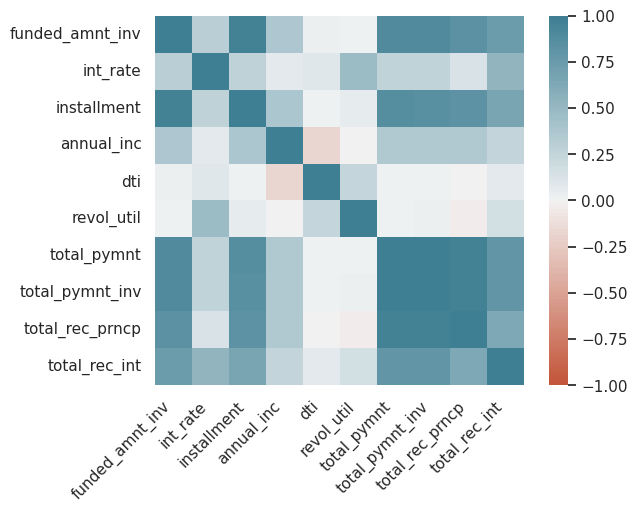

In [472]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

numCol = []
for col in LC_df:
  if LC_df[col].dtype == float:
    numCol.append(col)
corr = LC_df[numCol].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [473]:
corr_score = LC_df[numCol].corr()
corr_score

,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_util,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
funded_amnt_inv,1.000000,0.302945,0.959195,0.371554,0.025192,0.022395,0.884368,0.885395,0.829373,0.734486
int_rate,0.302945,1.000000,0.267857,0.076103,0.091614,0.470893,0.259296,0.258493,0.124425,0.531955
installment,0.959195,0.267857,1.000000,0.385192,0.017451,0.056484,0.859719,0.859358,0.827792,0.660184
annual_inc,0.371554,0.076103,0.385192,1.000000,-0.176920,-0.005319,0.366455,0.364869,0.365577,0.253143
dti,0.025192,0.091614,0.017451,-0.176920,1.000000,0.243479,0.020130,0.019860,-0.004552,0.077365
revol_util,0.022395,0.470893,0.056484,-0.005319,0.243479,1.000000,0.022241,0.024014,-0.036570,0.171383
total_pymnt,0.884368,0.259296,0.859719,0.366455,0.020130,0.022241,1.000000,0.998224,0.968533,0.795019
total_pymnt_inv,0.885395,0.258493,0.859358,0.364869,0.019860,0.024014,0.998224,1.000000,0.966596,0.794365
total_rec_prncp,0.829373,0.124425,0.827792,0.365577,-0.004552,-0.036570,0.968533,0.966596,1.000000,0.634057
total_rec_int,0.734486,0.531955,0.660184,0.253143,0.077365,0.171383,0.795019,0.794365,0.634057,1.000000


The above two figures show that there may be strong correlations between certain data (for example: dark areas in the heatmap except for diagonal lines and data near 1 in the corr)

<Axes: ylabel='purpose'>

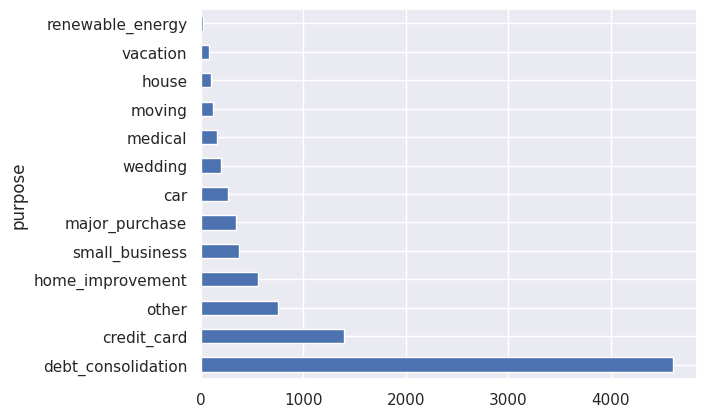

In [474]:
LC_df["purpose"].value_counts().plot(kind='barh')

The borrower's borrowing purpose is shown in the figure, and it can be seen that the borrower's borrowing purpose is mainly focused on debt restructuring and credit card.

<Axes: title={'center': 'LC Loan Amount'}, xlabel='loan_amnt'>

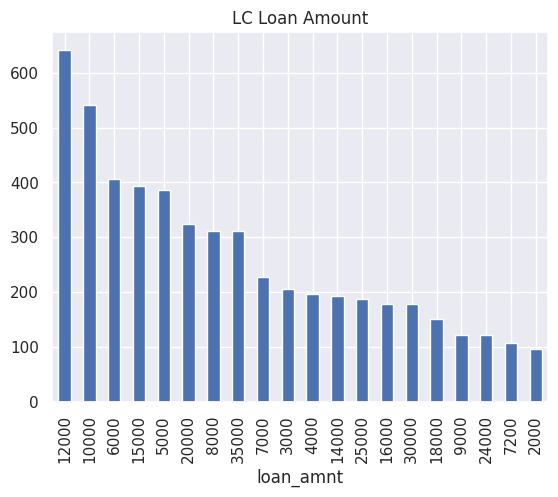

In [475]:
LC_df["loan_amnt"].value_counts()[:20].plot(kind='bar', title="LC Loan Amount")

Borrower's loan amount is shown in the figure. It can be observed that the majority of people's borrowing amounts are concentrated around 12000 and 6000.

<Axes: ylabel='count'>

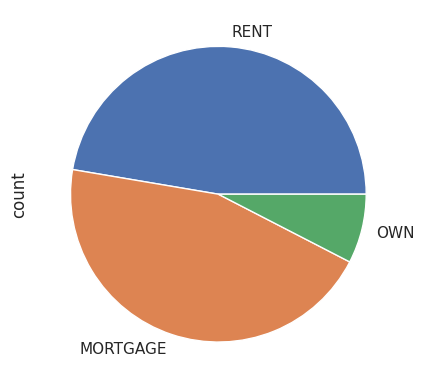

In [476]:
LC_df["home_ownership"].value_counts().plot(kind='pie')

The borrower's housing situation is shown in the picture. Only a few borrowers own a house, while the majority of borrowers are in the state of renting or mortgaging their house for loans.

<Axes: xlabel='emp_length'>

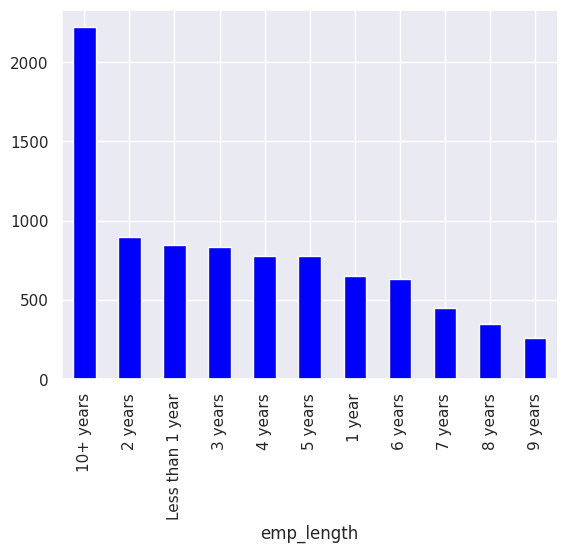

In [477]:
LC_df["emp_length"].value_counts().plot(kind='bar', color='blue')

The borrower's employment time is shown in the figure. The length of employment can reflect the borrower's repayment ability  to some extent, with the highest number of borrowers having been employed for more than ten years. In addition, borrowers generally have shorter working hours, with most working within three years, and the number of borrowers is significantly higher than those working for 7-9 years.

In [478]:
#Classify data by location and prepare for drawing a map
df_location = LC_df.groupby("addr_state",).sum().reset_index()
df_location = df_location.filter(["addr_state", "loan_amnt"], axis = 1)

df_location.head()

,addr_state,loan_amnt
0,AK,359675
1,AL,1308425
2,AR,753275
3,AZ,2477200
4,CA,20470425


According to the data in the table, it can be seen that the number of borrowers in California is significantly higher, 8-9 times that of the second ranked state of Arizona.

In [479]:
#Create a map that displays the regions borrowers come from
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df_location['addr_state'], # Spatial coordinates
    z = df_location['loan_amnt'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "USD",
))

fig.update_layout(
    title_text = 'Total amount issued by State',
    geo_scope='usa', # limited map scope to USA
)

fig.show()

Project the number of borrowers onto the map

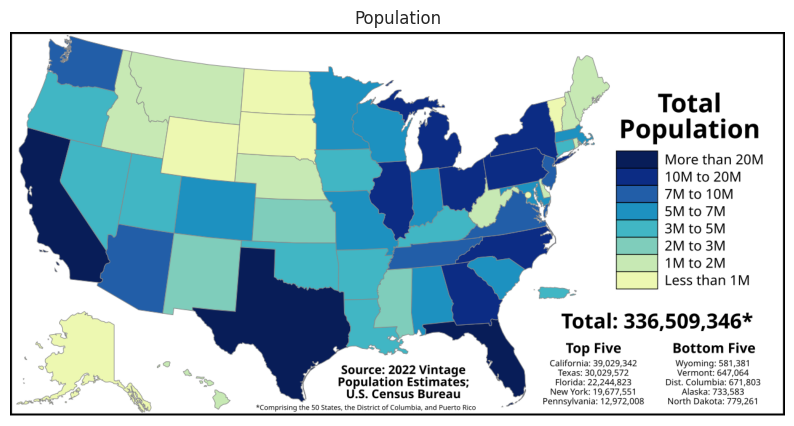

In [480]:
import matplotlib.image as mpimg

img = mpimg.imread('/data/notebook_files/Population_by_U.S._state.svg.png')

plt.figure(figsize=(10, 8)) 
plt.imshow(img)
plt.axis('off')  
plt.title('Population')
plt.show()

Then download the population distribution of each continent in the United States from the official website. After comparing the two maps, the distribution of borrowers roughly conforms to the population distribution of various continents in the United States. If the number of borrowers in a region is abnormally higher than that of a region with a similar population, it indicates that there may be criminal activities related to borrowing in this area, and the possibility of not receiving repayment will increase significantly.

<Axes: xlabel='grade', ylabel='count'>

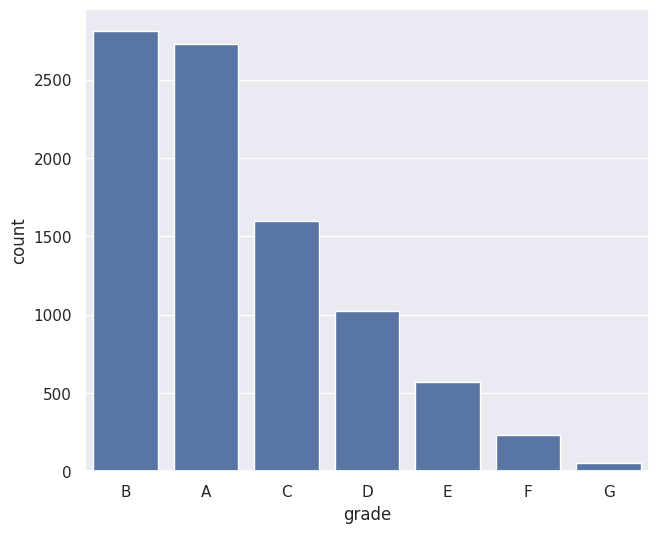

In [481]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="grade", data= LC_df, order = LC_df['grade'].value_counts().index)

The above chart shows that the number of people with credit ratings of A and B is the highest, while the number of EFG is in the minority, and these minority borrowers are more likely to not receive repayments.

<Axes: xlabel='loan_status', ylabel='count'>

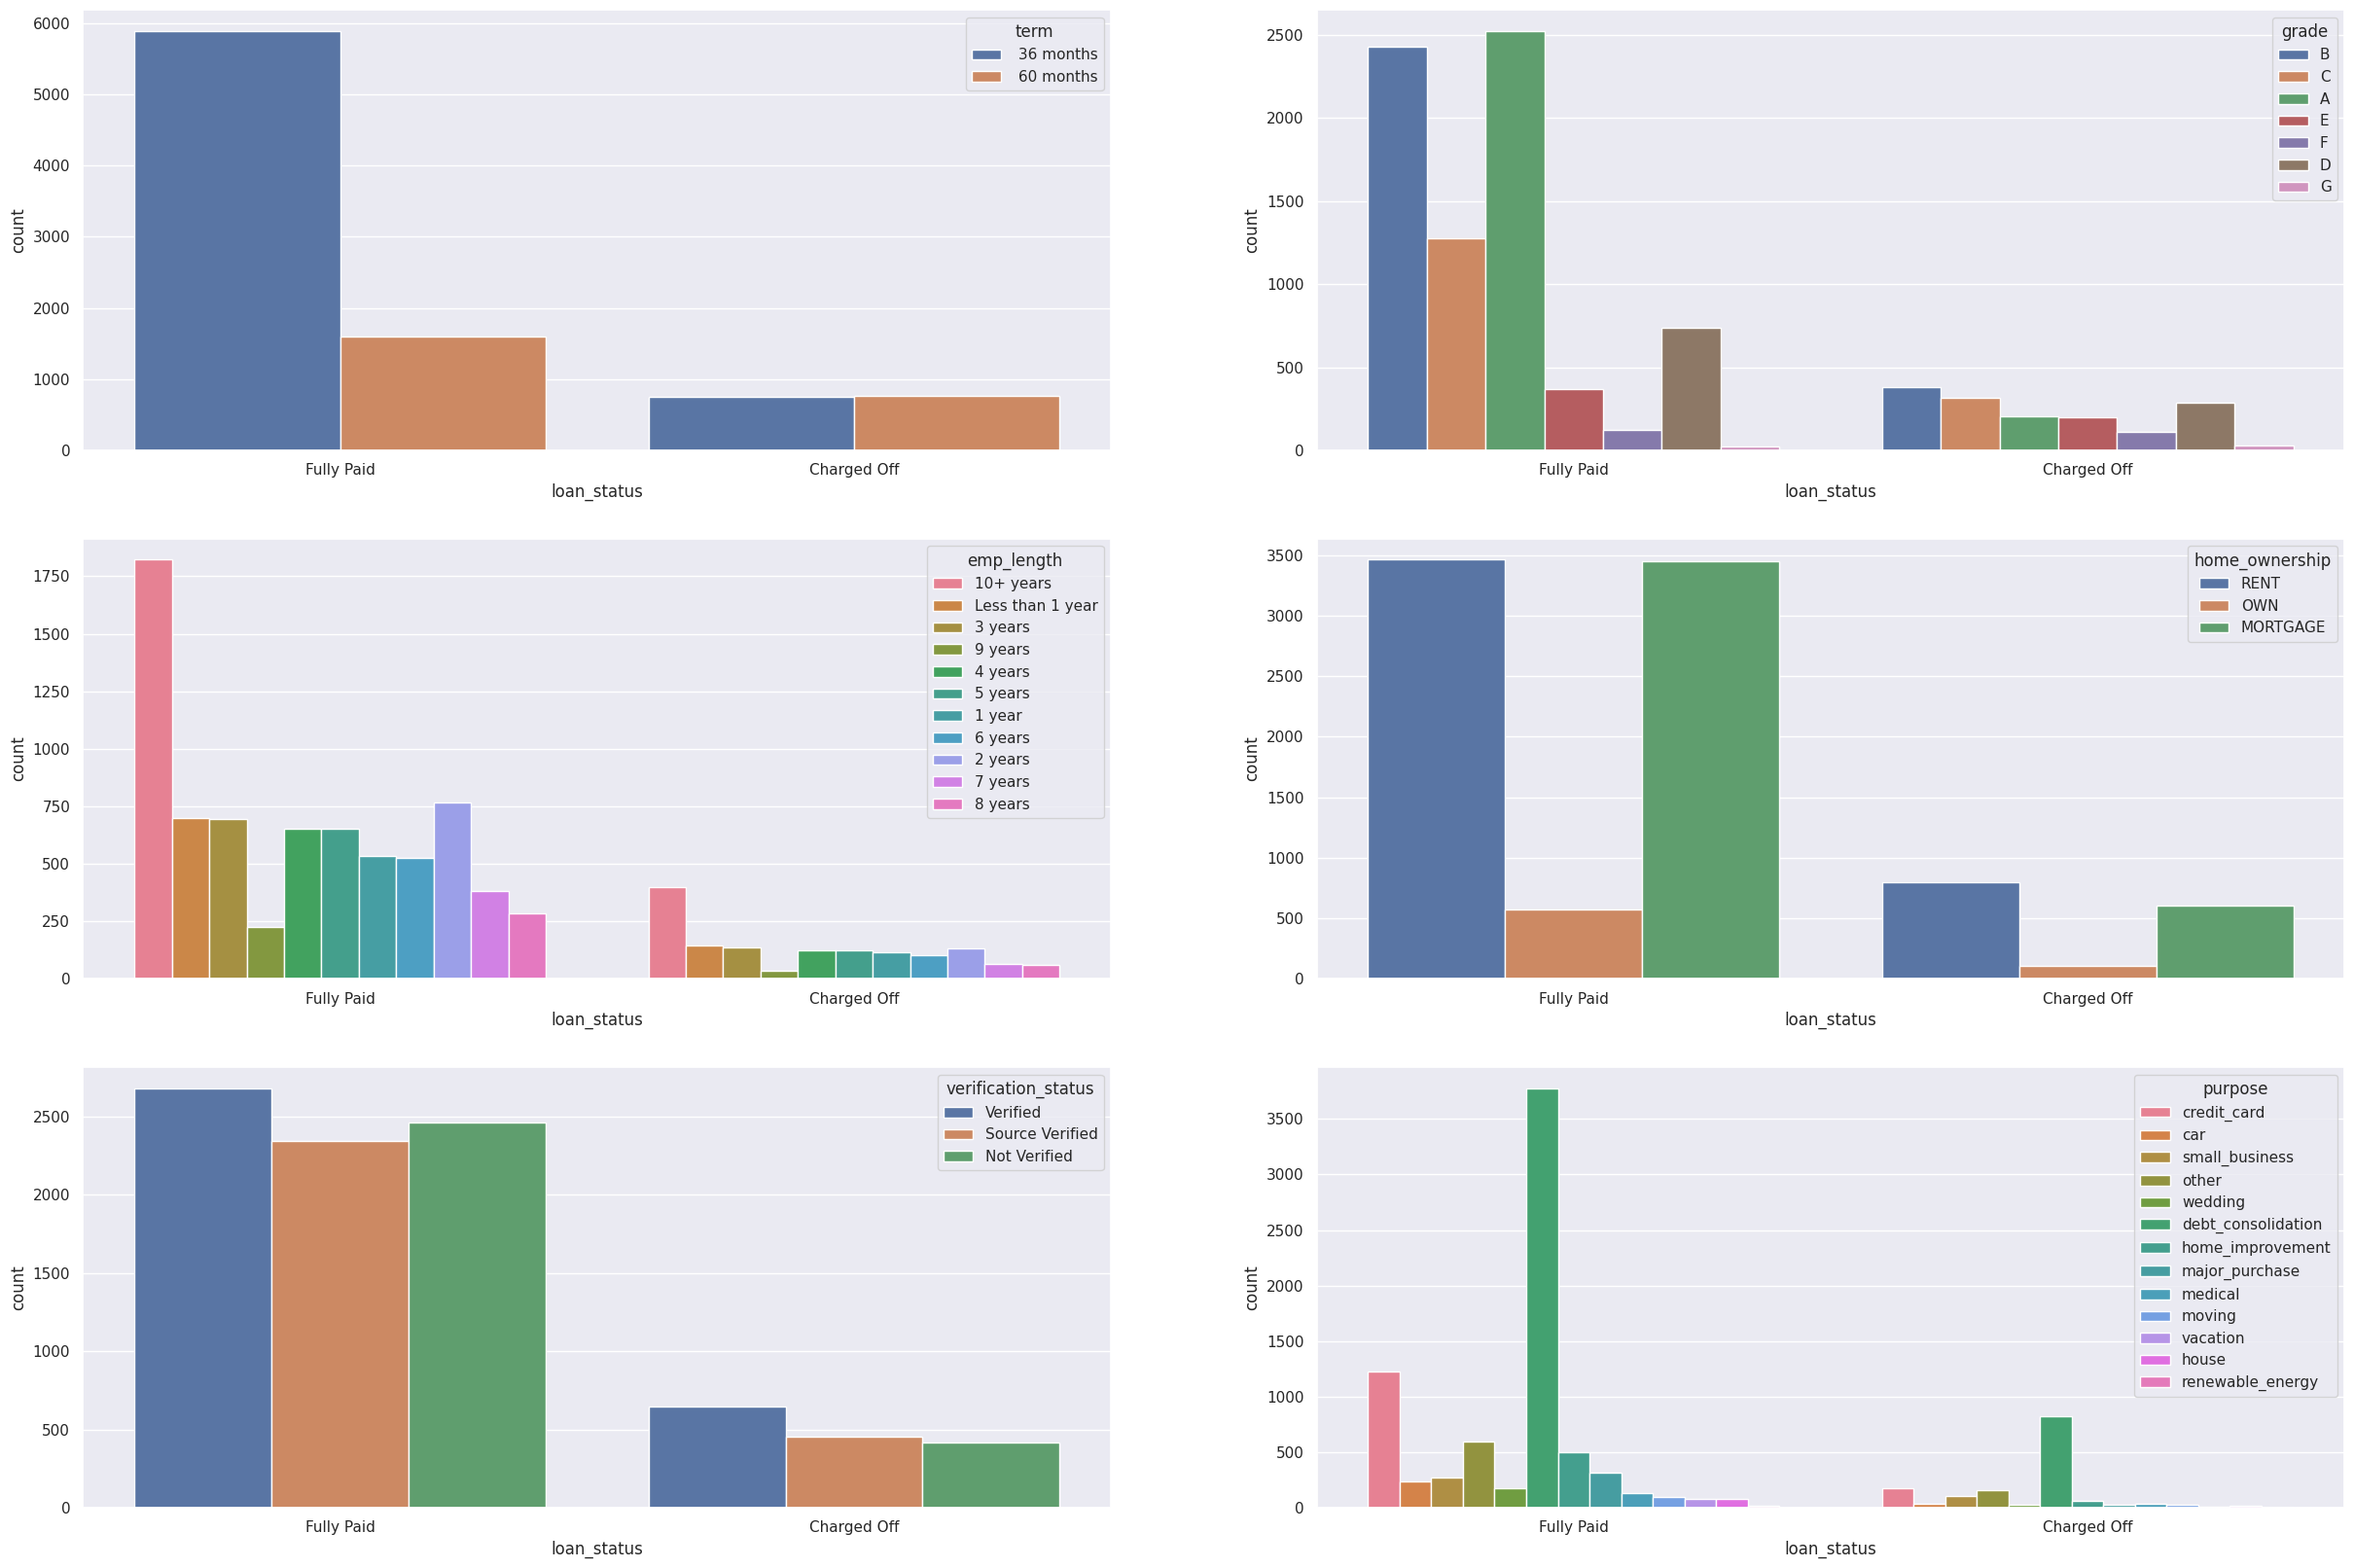

In [482]:
_,axss = plt.subplots(3,2, figsize=[30,20])
sns.countplot(x='loan_status', hue='term', data=LC_df, ax=axss[0][0])
sns.countplot(x='loan_status', hue='grade', data=LC_df, ax=axss[0][1])
sns.countplot(x='loan_status', hue='emp_length', data=LC_df, ax=axss[1][0])
sns.countplot(x='loan_status', hue='home_ownership', data=LC_df, ax=axss[1][1])
sns.countplot(x='loan_status', hue='verification_status', data=LC_df, ax=axss[2][0])
sns.countplot(x='loan_status', hue='purpose', data=LC_df, ax=axss[2][1])

According to the above picture, term and grade have a significant impact on whether to repay, while other variables such as emp length, home ownership, verification status, and purpose have relatively little impact on whether to repay.

# Part 2: Data cleaning and Feature Preprocessing

In [483]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
X = LC_df.copy()

#Delete high correlation and high variance columns
X = X.drop(["total_pymnt"], axis=1)
X = X.drop(["total_pymnt_inv"], axis=1)
X = X.drop(["total_rec_int"], axis=1)
X = X.drop(["id"], axis=1)
X = X.drop(["total_rec_prncp"], axis=1)

X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,loan_status
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,...,31048,1,3,0,13648,83.7,9,0,0,Fully Paid
1,2500,2500,2500.0,60 months,15.27,59.83,C,Less than 1 year,RENT,30000.0,...,36251,5,3,0,1687,9.4,4,0,0,Charged Off
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,...,43040,2,2,0,2956,98.5,10,0,0,Fully Paid
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,...,35096,1,10,0,5598,21.0,37,0,0,Fully Paid
4,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,...,43043,3,9,0,7963,28.3,12,0,0,Fully Paid


In [484]:
# split dataset
from sklearn.model_selection import train_test_split
#extract 20% of data
yPredict = X.loan_status
XClean = X.drop(["loan_status"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(XClean, yPredict, random_state=10, test_size=.2)

X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv
7220,4950,4950,4950.0,60 months,13.49,113.88,C,8 years,MORTGAGE,48000.0,...,17.85,34973,0,13,0,20762,70.4,30,0,0
8708,3000,3000,3000.0,36 months,5.42,90.48,A,10+ years,MORTGAGE,70000.0,...,13.94,34851,0,9,0,4062,12.6,23,0,0
2662,10500,10500,10500.0,36 months,15.96,368.95,C,10+ years,OWN,45000.0,...,21.28,36800,2,9,0,7795,77.2,22,0,0
5020,14000,14000,14000.0,36 months,14.27,480.33,C,10+ years,RENT,46900.0,...,13.94,36647,2,6,0,15991,97.5,16,0,0
5424,10000,10000,10000.0,60 months,10.65,215.69,B,3 years,RENT,60000.0,...,24.34,35827,2,9,0,9408,47.5,28,0,0


In [485]:
class_mapping = {'Fully Paid': 0, 'Charged Off': 1}
y_train = y_train.map(class_mapping)
y_test = y_test.map(class_mapping)
def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns = enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)
categories = ['home_ownership','verification_status','purpose','addr_state']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

class_mapping = {label: idx for idx, label in enumerate(np.unique(X_train['term']))}
X_train['term'] = X_train['term'].map(class_mapping)
class_mapping = {label: idx for idx, label in enumerate(np.unique(X_train['grade']))}
X_train['grade'] = X_train['grade'].map(class_mapping)

class_mapping = {label: idx for idx, label in enumerate(np.unique(X_test['term']))}
X_test['term'] = X_test['term'].map(class_mapping)
class_mapping = {label: idx for idx, label in enumerate(np.unique(X_test['grade']))}
X_test['grade'] = X_test['grade'].map(class_mapping)

X_train.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,dti,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,4950,4950,4950.0,1,13.49,113.88,2,8 years,48000.0,17.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3000,3000,3000.0,0,5.42,90.48,0,10+ years,70000.0,13.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10500,10500,10500.0,0,15.96,368.95,2,10+ years,45000.0,21.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14000,14000,14000.0,0,14.27,480.33,2,10+ years,46900.0,13.94,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10000,10000,10000.0,1,10.65,215.69,1,3 years,60000.0,24.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,14000,14000,14000.0,1,17.27,349.98,3,9 years,72000.0,20.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,9100,9100,9100.0,0,6.03,276.97,0,10+ years,42000.0,14.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,12000,12000,12000.0,0,6.03,365.23,0,4 years,60000.0,7.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,12000,12000,11750.0,0,9.91,386.70,1,3 years,140000.0,10.16,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,20000,20000,19975.0,1,16.89,495.87,3,4 years,45000.0,17.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [486]:
#deal with missing value
X_train = X_train.select_dtypes(include=[np.number]).interpolate().dropna()
X_test = X_test.select_dtypes(include=[np.number]).interpolate().dropna()

X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,dti,earliest_cr_line,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,4950,4950,4950.0,1,13.49,113.88,2,48000.0,17.85,34973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3000,3000,3000.0,0,5.42,90.48,0,70000.0,13.94,34851,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10500,10500,10500.0,0,15.96,368.95,2,45000.0,21.28,36800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14000,14000,14000.0,0,14.27,480.33,2,46900.0,13.94,36647,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10000,10000,10000.0,1,10.65,215.69,1,60000.0,24.34,35827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [487]:
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)  # Transform and retain DataFrame structure
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)  # Apply transformation to test data

X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,dti,earliest_cr_line,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,-0.887716,-0.892129,-0.889268,1.678443,0.320642,-1.077173,0.418304,-0.427059,0.590340,-0.534801,...,-0.050052,-0.011783,-0.276624,-0.089311,-0.177497,-0.04413,-0.151684,-0.110571,-0.060189,-0.03537
1,-1.123389,-1.133503,-1.132455,-0.595790,-1.602061,-1.180576,-1.040444,0.012230,0.000261,-0.562600,...,-0.050052,-0.011783,-0.276624,-0.089311,-0.177497,-0.04413,-0.151684,-0.110571,-0.060189,-0.03537
2,-0.216953,-0.205141,-0.197117,-0.595790,0.909127,0.049961,0.418304,-0.486962,1.107979,-0.118496,...,-0.050052,-0.011783,-0.276624,-0.089311,-0.177497,-0.04413,-0.151684,-0.110571,-0.060189,-0.03537
3,0.206051,0.228095,0.239374,-0.595790,0.506480,0.542141,0.418304,-0.449024,0.000261,-0.153359,...,-0.050052,-0.011783,3.615019,-0.089311,-0.177497,-0.04413,-0.151684,-0.110571,-0.060189,-0.03537
4,-0.277382,-0.267032,-0.259473,1.678443,-0.355997,-0.627283,-0.311070,-0.187447,1.569780,-0.340206,...,-0.050052,-0.011783,-0.276624,-0.089311,-0.177497,-0.04413,-0.151684,-0.110571,-0.060189,-0.03537


# Part 3: Model Training and Selection

In [488]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
#build four different models
classifier_logistic = LogisticRegression()
classifier_KNN = KNeighborsClassifier()
classifier_RF = RandomForestClassifier()
classifier_SVC = SVC()

In [489]:
from sklearn.metrics import classification_report, confusion_matrix

classifier_logistic.fit(X_train, y_train)

prediction_Regression = classifier_logistic.predict(X_test)
print(classification_report(y_test, prediction_Regression))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1510
           1       0.51      0.11      0.18       291

    accuracy                           0.84      1801
   macro avg       0.68      0.54      0.54      1801
weighted avg       0.80      0.84      0.79      1801



In [490]:
classifier_KNN.fit(X_train,y_train)
prediction_KNN = classifier_KNN.predict(X_test)
print(classification_report(y_test,prediction_KNN))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1510
           1       0.29      0.09      0.14       291

    accuracy                           0.82      1801
   macro avg       0.57      0.52      0.52      1801
weighted avg       0.76      0.82      0.78      1801



In [491]:
classifier_RF.fit(X_train,y_train)
prediction_RF = classifier_RF.predict(X_test)
print(classification_report(y_test,prediction_RF))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1510
           1       0.51      0.07      0.12       291

    accuracy                           0.84      1801
   macro avg       0.68      0.53      0.51      1801
weighted avg       0.79      0.84      0.78      1801



In [492]:
classifier_SVC.fit(X_train,y_train)
prediction_SVC = classifier_SVC.predict(X_test)
print(classification_report(y_test,prediction_SVC))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1510
           1       0.00      0.00      0.00       291

    accuracy                           0.84      1801
   macro avg       0.42      0.50      0.46      1801
weighted avg       0.70      0.84      0.76      1801



In [493]:
#5-fold cross-validation
from sklearn import model_selection

model_names = ['Logistic Regression','KNN','Random Forest','SVC']
model_list = [classifier_logistic, classifier_KNN, classifier_RF,classifier_SVC]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.83691881 0.84247051 0.83275503 0.82777778 0.82638889]
Model accuracy of Logistic Regression is 0.8332622021744157
[0.80985427 0.81054823 0.81401804 0.80694444 0.81736111]
Model accuracy of KNN is 0.8117452193692651
[0.83553088 0.83067314 0.82997918 0.82569444 0.82291667]
Model accuracy of Random Forest is 0.8289588634435964
[0.83136711 0.82997918 0.82859126 0.82916667 0.82847222]
Model accuracy of SVC is 0.8295152864523093


- Comparing the four models, it can be seen that their accuracy is very similar, with LR having the highest accuracy;
- In practical application, it is believed that the lending club would prefer to find possible unrecoverable payments as much as possible, so the reacll of the model will be more important in this project. LR performs better in this regard;
- Finally, LR performs the best in terms of precision;
- Overall, the Logistics Regression model performed the best in this project;

# Part 4 : Feature Importance

In [494]:
X_with_corr = XClean.copy()


X_with_corr.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,...,27.65,31048,1,3,0,13648,83.7,9,0,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,Less than 1 year,RENT,30000.0,...,1.00,36251,5,3,0,1687,9.4,4,0,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,...,8.72,43040,2,2,0,2956,98.5,10,0,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,...,20.00,35096,1,10,0,5598,21.0,37,0,0
4,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,...,11.20,43043,3,9,0,7963,28.3,12,0,0


In [495]:

X_with_corr = OneHotEncoding(X_with_corr, enc_ohe, categories)

class_mapping = {label: idx for idx, label in enumerate(np.unique(X_with_corr['term']))}
X_with_corr['term'] = X_with_corr['term'].map(class_mapping)
class_mapping = {label: idx for idx, label in enumerate(np.unique(X_with_corr['grade']))}
X_with_corr['grade'] = X_with_corr['grade'].map(class_mapping)
X_with_corr = X_with_corr.select_dtypes(include=[np.number]).interpolate().dropna()
X_with_corr.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,dti,earliest_cr_line,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,5000,5000,4975.0,0,10.65,162.87,1,24000.0,27.65,31048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2500,2500,2500.0,1,15.27,59.83,2,30000.0,1.00,36251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2400,2400,2400.0,0,15.96,84.33,2,12252.0,8.72,43040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10000,10000,10000.0,0,13.49,339.31,2,49200.0,20.00,35096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5000,5000,5000.0,0,7.90,156.46,0,36000.0,11.20,43043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***To some extent feature importance determines the degree of impact on whether the borrower repays the money, so we first rank the best performing Logistics Regression based on feature importance***

In [496]:
#Using L1 regularization to obtain feature importance
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 10, solver='liblinear')
LRmodel_l1.fit(X_l1, yPredict)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
int_rate : -0.5622
annual_inc : 0.5092
term : -0.4131
funded_amnt : 0.3927
funded_amnt_inv : -0.2811
purpose_small_business : -0.1725
revol_util : -0.1554
loan_amnt : -0.1531
purpose_other : -0.1365
grade : 0.1253
purpose_credit_card : 0.1124
inq_last_6mths : -0.1019
purpose_medical : -0.0774
purpose_moving : -0.0717
addr_state_TX : 0.0711
addr_state_UT : 0.0704
purpose_major_purchase : 0.0683
addr_state_KS : 0.0675
home_ownership_RENT : -0.0637
addr_state_NV : -0.0625
earliest_cr_line : 0.0621
installment : -0.0595
addr_state_CA : -0.059
open_acc : -0.058
total_acc : 0.0561
verification_status_Not Verified : -0.0554
addr_state_RI : -0.0532
pub_rec : -0.0527
addr_state_MD : -0.0513
addr_state_AR : 0.0506
addr_state_TN : 0.0491
addr_state_MT : 0.0486
addr_state_MS : 0.0456
addr_state_OK : 0.0452
addr_state_MO : 0.0427
addr_state_FL : -0.0394
addr_state_CO : 0.0385
dti : -0.0384
addr_state_AK : -0.0379
addr_state_SD : -0.0369
verification_status_Veri

In the LR model, the most influential ones are int_rate, annual_inc, term, etc

**As a comparison, we will rank Random Forests**

In [497]:
yPredict = yPredict .map({'Fully Paid': 0, 'Charged Off': 1})

In [498]:
# check feature importance of random forests
forest = RandomForestClassifier()
forest.fit(X_with_corr, yPredict)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importance ranking by Random Forest Model:")
for ind in range(X_with_corr.shape[1]):  # Use X_with_corr shape here
    print("{0} : {1}".format(X_with_corr.columns[indices[ind]], round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
int_rate : 0.0715
revol_util : 0.0684
annual_inc : 0.0677
earliest_cr_line : 0.0641
dti : 0.0637
revol_bal : 0.0635
installment : 0.0573
total_acc : 0.0542
funded_amnt_inv : 0.0531
funded_amnt : 0.0452
loan_amnt : 0.0446
open_acc : 0.044
grade : 0.0335
term : 0.0295
inq_last_6mths : 0.0238
addr_state_CA : 0.0102
purpose_debt_consolidation : 0.0097
verification_status_Source Verified : 0.0093
home_ownership_RENT : 0.0091
home_ownership_MORTGAGE : 0.0084
verification_status_Verified : 0.0082
verification_status_Not Verified : 0.0079
purpose_small_business : 0.0076
purpose_other : 0.0073
addr_state_NY : 0.0069
purpose_credit_card : 0.0068
addr_state_FL : 0.0065
pub_rec : 0.0059
addr_state_TX : 0.0047
addr_state_IL : 0.0047
addr_state_NJ : 0.0046
home_ownership_OWN : 0.0045
addr_state_VA : 0.0043
addr_state_MD : 0.0041
addr_state_OH : 0.0041
addr_state_GA : 0.0041
purpose_home_improvement : 0.0041
addr_state_PA : 0.0038
addr_state_WA : 0.0

In RF, the influential factors ranked high are int_rate, revol_util, annual_inc, while some important influencing factors in LR, such as term, rank low in the RF model.
- **It is not difficult to find in Part 1 that some classifications (such as terms) have a significant impact on whether borrowers repay on time, and obviously this is better reflected in Logistics Regression than Random Forests**

# Sheet 2